# MNIST 
I have been watching the 3 Blue 1 brown videos on Deep learning and its helped by intuition of the inner workings of a NN. 
https://www.youtube.com/watch?v=aircAruvnKk&ab_channel=3Blue1Brown

Wanted to give the MNIST dataset a try.


Using sentdex as an outline for TF& Keras
https://www.youtube.com/watch?v=wQ8BIBpya2k&ab_channel=sentdex


In [ ]:
import tensorflow as tf
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

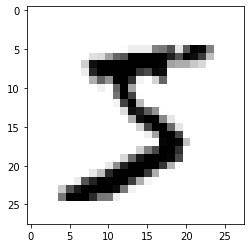

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary) #original images are w/b/gs
plt.show()

# EZ Evaluate 

In [ ]:
model_track = pd.DataFrame(columns=['Type', 'ID', "Accuracy", "Loss"])
# Method to append models classification report into a DF:
def save_models(m_type, m_ID, model_track):
    model_track_update = model_track.append({
        "Type":  m_type,
        "ID": m_ID,
        "Accuracy": test_acc, 
        "Loss": test_loss, 
    }, ignore_index=True)
    return model_track_update

## Input

**Hidden and output with relu**


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #flattens 28*28 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #node count and activation#
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #node count and activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #node count and activation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 4.2005 - accuracy: 0.8198
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3226 - accuracy: 0.9285
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2187 - accuracy: 0.9443


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
model_track = save_models("TF:NN", "relu", model_track)

313/313 [==============================] - 1s 1ms/step - loss: 0.2036 - accuracy: 0.9469


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #flattens 28*28 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid)) #node count and activation (sigmoid was replaced by relu)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid)) #node count and activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #node count and activation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8240 - accuracy: 0.7838
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3687 - accuracy: 0.8862
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3422 - accuracy: 0.8942


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
model_track = save_models("TF:NN", "sigmoid", model_track)

313/313 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.9113


## Normalized

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1) #changes values to be between 0-1. 
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #flattens 28*28 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #node count and activation#
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #node count and activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #node count and activation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4759 - accuracy: 0.8644
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1123 - accuracy: 0.9656
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9778


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
model_track = save_models("TF:NN", "Norm&relu", model_track)

313/313 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9705


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #flattens 28*28 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid)) #node count and activation (sigmoid was replaced by relu)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid)) #node count and activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #node count and activation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9456 - accuracy: 0.7351
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2390 - accuracy: 0.9282
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1735 - accuracy: 0.9484


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
model_track = save_models("TF:NN", "Norm&sigmoid", model_track)

313/313 [==============================] - 0s 1ms/step - loss: 0.1484 - accuracy: 0.9547


In [ ]:
model_track

,Type,ID,Accuracy,Loss
0,TF:NN,relu,0.9469,0.203608
1,TF:NN,sigmoid,0.9113,0.287991
2,TF:NN,Norm&relu,0.9705,0.093046
3,TF:NN,Norm&sigmoid,0.9547,0.148379


# Review
Normalization improves both loss and accuracy, relu performs better than sigmoid

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #flattens 28*28 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #node count and activation#
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #node count and activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #node count and activation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4699 - accuracy: 0.8649
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1082 - accuracy: 0.9662
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0709 - accuracy: 0.9772


In [ ]:
model.save('MNIST_TF_test.model')

INFO:tensorflow:Assets written to: MNIST_TF_test.model/assets


In [ ]:
predictions = model.predict([x_test])

Consider rewriting this model with the Functional API.


In [ ]:
print(np.argmax(predictions[0]))

7


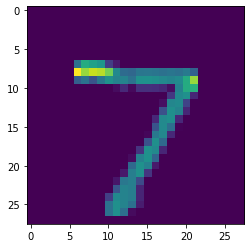

In [ ]:
plt.imshow(x_test[0])
plt.show()